<a href="https://colab.research.google.com/github/Umerfarooq122/Lasso-Rigde-and-Principal-Component-Analysis-in-Python/blob/main/Blog_2_L1%2C_L2_and_PCA_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lasso, Rigde and Principal Component Analysis in Python**

## **Importing Libraries:**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## **Lasso (L1 Regularization)**

Lasso, short for Least Absolute Shrinkage and Selection Operator, is a regularization technique used in machine learning and statistics, particularly in regression models. It adds a penalty term to the standard regression objective function, aiming to prevent overfitting and promote feature selection by shrinking the coefficients of less important features to zero

The L1 regularization term used in Lasso is based on the absolute values of the coefficients of the features. This penalty term is added to the ordinary least squares (OLS) cost function to create a modified objective function. By doing so, it encourages sparsity in the coefficient values, effectively eliminating some less relevant features from the model.

The key aspect of Lasso is its ability to perform feature selection by driving some coefficients to exactly zero, effectively disregarding those features in the model. This feature makes Lasso particularly useful when dealing with high-dimensional data or when there is a suspicion that many features may not be relevant to the target prediction

### **Loading and Preprocessing Data:**

In this study we will use the same data set that we used in our previous blog for simple linear regression and BoxCox transformation.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/linear-regression-and-box-cox-transformation-in-python/main/insurance.csv')

In [3]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Since we have columns like `sex` and `smoker` which contains categorical data so we can replace the categorical data by dummy variables using `get_dummies` with '*OHE*'.

In [4]:
cat_cols = ["sex","smoker","region"]
df_encode = pd.get_dummies(data = data, prefix ='OHE', prefix_sep= '_',
                           columns= cat_cols,drop_first= True, dtype= 'int8')

In [5]:
df_encode.head()

,age,bmi,children,expenses,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


### **Application of Lasso with Standardized Data**

Now that our data set is preprocessed so we can go ahead and apply Lasso to our data set. before we go ahead let's split the dataset between test and train.

In [6]:
X = df_encode.drop(['expenses'], axis = 1)
y = df_encode['expenses']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now that our data is split between testing and training set we can move forward with standardizing the data sets.

In [7]:
# Scale the features (important for Lasso regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Now that the data is standardized using `StandardScaler()` we can fit our training to create a lasso model

In [8]:
# Create a Lasso model with L1 regularization
lasso = Lasso(alpha=500)  # Alpha controls the strength of the regularization

# Fit the model to the training data
lasso.fit(X_train, y_train)


Lasso(alpha=500)

In [9]:
# Make predictions
lasso_predictions = lasso.predict(X_test)

# Evaluate the model
score = lasso.score(X_test, y_test)
print("Model R-squared score:", score)
print(f"Coefficients : {lasso.coef_}")

Model R-squared score: 0.771712196712848
Coefficients : [3171.08044043 1527.87175604   51.68952957    0.         9040.88638515
   -0.            0.           -0.        ]


In [10]:
lasso_resid = y_test-lasso_predictions

<ipython-input-11-fc6646e16d93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lasso_resid)


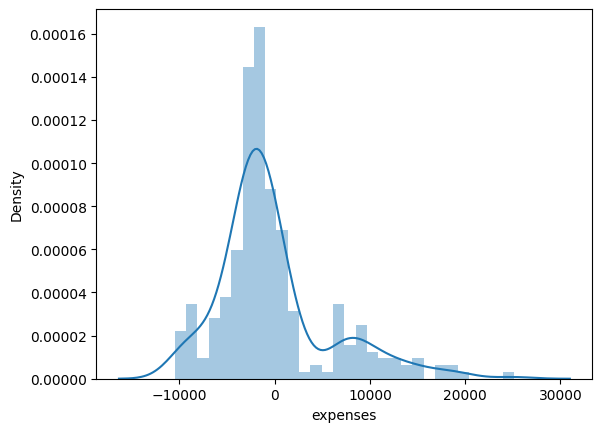

In [11]:
sns.distplot(lasso_resid)
plt.show()

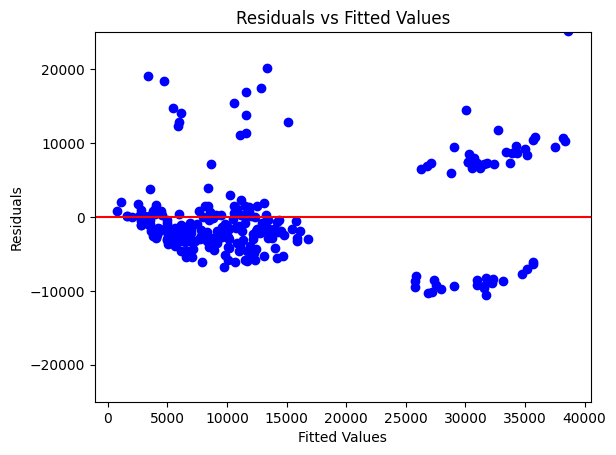

In [12]:
plt.scatter(lasso_predictions,lasso_resid,color='b')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.ylim(-25000,25000)
plt.title('Residuals vs Fitted Values')
plt.show()

As we can see that the residuals vs fitted values plot is again not homoscedastic which means that Lasso might reduce the number of parameters but since there is non linearity in the data and Lasso cannot fix that

## **Rigde (L2 Regularization)**

Ridge regularization, also known as L2 regularization, is a technique used in machine learning to prevent overfitting. It's particularly common in linear regression models.

The primary goal of ridge regularization is to add a penalty term to the cost function of the model, which discourages overly complex models by penalizing the magnitudes of the coefficients. This penalty term is proportional to the square of the magnitude of coefficients.

By adding this penalty term, ridge regression pushes the coefficients of less influential features closer to zero without completely eliminating them. This helps in reducing the model's sensitivity to the input data and reduces overfitting, leading to better generalization to new, unseen data.

In order to apply L2 regulazartion we would require same type of standardized data as we did for Lasso and the data we prepared for Lasso can be used for Ridge too.

In [13]:
# Create a Lasso model with L1 regularization
ridge = Ridge(alpha=500)  # Alpha controls the strength of the regularization

# Fit the model to the training data
ridge.fit(X_train, y_train)

Ridge(alpha=500)

In [14]:
# Make predictions
ridge_predictions = ridge.predict(X_test)

# Evaluate the model
score = ridge.score(X_test, y_test)
print("Model R-squared score:", score)
print(f"Coefficients : {ridge.coef_}")

Model R-squared score: 0.6911910948196005
Coefficients : [2408.04309049 1422.73667378  433.03248904  146.71192885 6456.14248646
  -95.49365256   52.65777288 -191.13720072]


In [15]:
ridge_resid = y_test-ridge_predictions

<ipython-input-16-fc6646e16d93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lasso_resid)


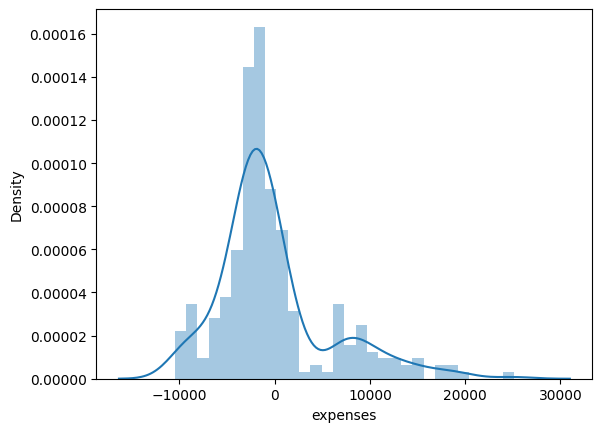

In [16]:
sns.distplot(lasso_resid)
plt.show()

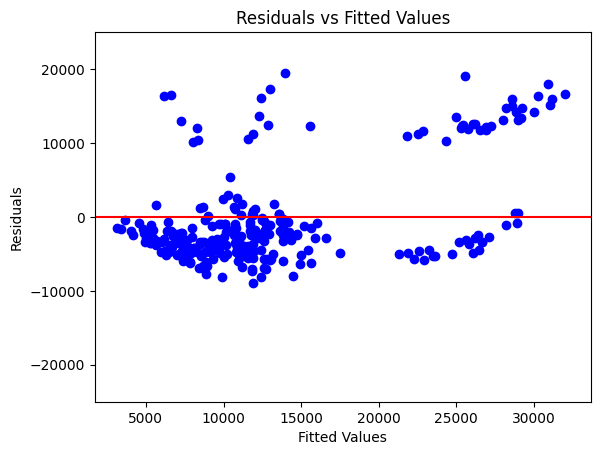

In [17]:
plt.scatter(ridge_predictions,ridge_resid,color='b')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.ylim(-25000,25000)
plt.title('Residuals vs Fitted Values')
plt.show()

Again we see the non linearity and Ridge just like Lasso with its dimension reduction approach cannot solve our problem so dealing with this kind of data using Ridge regression might not be a very good approach and we to look for alternative.

## **Principal component Analysis (PCA):**

Principal Component Analysis (PCA) is a technique used for dimensionality reduction in data. It's particularly useful when dealing with datasets with many correlated variables or features. The main idea behind PCA is to transform the original features into a new set of features (the principal components) that are linearly uncorrelated and account for as much variance in the data as possible.

In [48]:
n_components = 8  # Choose the number of components to retain
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [49]:
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train)


LinearRegression()

In [50]:
pca_pred = pca_model.predict(X_test_pca)

In [51]:
pca_resid = y_test-pca_pred

In [52]:

mse = mean_squared_error(y_test, pca_pred)
r2 = r2_score(y_test, pca_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 33600065.35507784
R-squared: 0.7835726930039905


<ipython-input-53-50c9448bd9bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pca_resid)


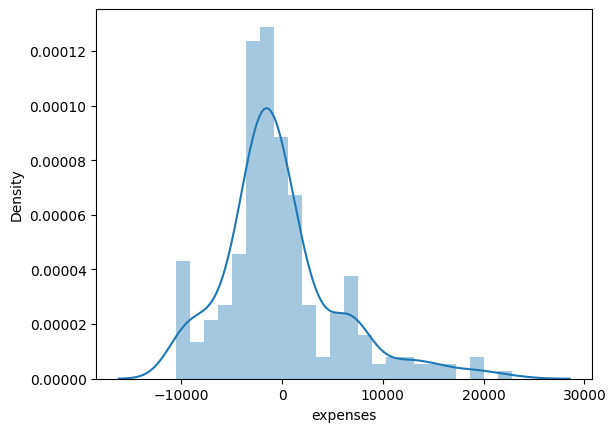

In [53]:
sns.distplot(pca_resid)
plt.show()

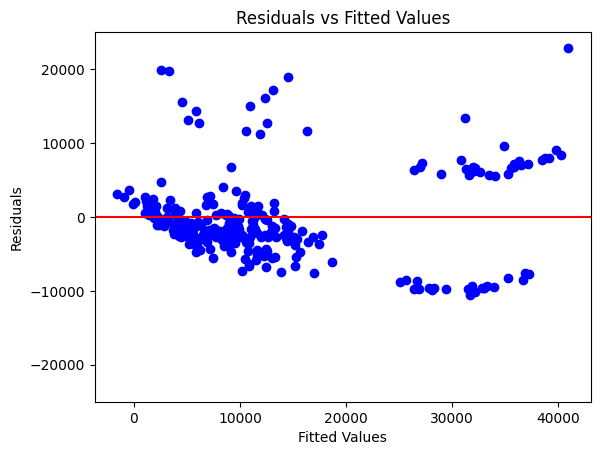

In [54]:
plt.scatter(pca_pred,pca_resid,color='b')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.ylim(-25000,25000)
plt.title('Residuals vs Fitted Values')
plt.show()

Again same non linearity problem can be observed and even PCA can not helps us and I had to use all the components of PCA to get a good $R^2$ and mean sqaure error. For this kind of data set we have to find another technique. In our next Blog we will try to apply Weighted and Robust regression in python on the same daa set and see if that can help us

## **Trying  Lasso Over Number of Alphas:**

In [55]:
features = X.columns

In [56]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))

    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)

    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

In [57]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

different alpha values: [0.01, 0.1, 1, 5, 8, 16, 32, 64, 128, 1000, 10000]


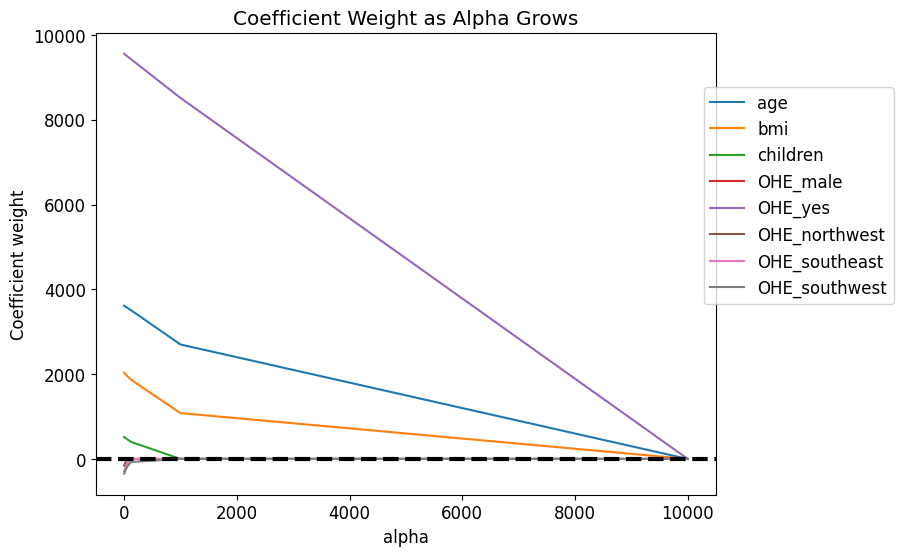

In [61]:
# does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8,16,32,64,128, 1000, 10000]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)

As we can see that we have to use a very strong alpha to get its effect on such kind of data set.